<a href="https://colab.research.google.com/github/benwichmann/GLC2022_FinalProject/blob/main/FinalNoteBookTools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install and Setup Conda Environment**

In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:23
🔁 Restarting kernel...


In [1]:
!conda --version
!which conda

conda 4.9.2
/usr/local/bin/conda


In [2]:
#!conda create --name firstEnv

#!conda env update -n base -f environment.yml
# activate your conda environment
%%bash
source activate firstEnv
python

# python commands are ready to run within your environment
import sys
print("Python version")
print (sys.version)

Python version
3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]


Could not find conda environment: firstEnv
You can list all discoverable environments with `conda info --envs`.



#Follow Code to Setup VS/JuypterLab on VM

In [ ]:
!conda install -c anaconda ipykernel

In [ ]:
!python -m ipykernel install --user --name=firstEnv

Installed kernelspec firstEnv in /root/.local/share/jupyter/kernels/firstenv


In [ ]:
#!pip install jupyterlab
!conda install -c conda-forge jupyterlab

In [ ]:
!pip install colabcode

In [ ]:
!pip install pyngrok

In [ ]:
#For GIT Hub NGROK account 26rJFvph8m9Jfxo8ZGBrPteo1Km_899AQ4JoWkZYacS4zVtZJ
!ngrok authtoken 26rJFvph8m9Jfxo8ZGBrPteo1Km_899AQ4JoWkZYacS4zVtZJ
#!ngrok config add-authtoken 26rJFvph8m9Jfxo8ZGBrPteo1Km_899AQ4JoWkZYacS4zVtZJ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
import colabcode as cc
cc.ColabCode(port = 10001,  lab = True)

#Retrieve my GIT Repo

In [3]:
!rm -rf GLC2022_FinalProject
!git clone https://github.com/benwichmann/GLC2022_FinalProject.git

Cloning into 'GLC2022_FinalProject'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 65 (delta 10), reused 50 (delta 5), pack-reused 0
Unpacking objects: 100% (65/65), done.


In [ ]:
!pip install -r GLC2022_FinalProject/requirements2.txt

In [ ]:
!pip uninstall -y shapely
!pip install shapely --no-binary shapely

# **Import Enviroment Variables**

In [6]:
%pylab inline --no-import-all
from pathlib import Path
DATA_PATH = Path("/content/drive/MyDrive/ds3/")

import matplotlib.pyplot as plt
%matplotlib inline
import rasterio
import numpy as np
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from GLC2022_FinalProject.GLC.plotting import plot_map
from GLC2022_FinalProject.GLC.data_loading.environmental_raster import PatchExtractor



Populating the interactive namespace from numpy and matplotlib


## Create US/FR Observations Training/Test Dataset

df_obs (train concate of us and fr)
df_obs_test (test concate of us and fr) 

# Loading Datasets Code

In [7]:
#/content/drive/MyDrive/ds3/observations
#DATA_PATH = Path("/content/drive/MyDrive/ds3/")

df_obs_us = pd.read_csv(DATA_PATH / "observations" / "observations_us_train.csv", sep=";")#, index_col="observation_id")
df_obs_fr = pd.read_csv(DATA_PATH / "observations" / "observations_fr_train.csv", sep=";")#, index_col="observation_id")
df_obs = pd.concat((df_obs_fr, df_obs_us))
print("Number of observations for training FR: {}".format(len(df_obs_us)))
print("Number of observations for training US: {}".format(len(df_obs_fr)))
print("Number of observations for testingtot: {}".format(len(df_obs)))

df_obs.head()

Number of observations for training FR: 956231
Number of observations for training US: 671244
Number of observations for testingtot: 1627475


,observation_id,latitude,longitude,species_id,subset
0,10561949,45.705116,1.424622,241,train
1,10131188,45.146973,6.416794,101,train
2,10799362,46.783695,-2.072855,700,train
3,10392536,48.604866,-2.825003,1456,train
4,10335049,48.815567,-0.161431,157,train


In [ ]:
df_obs_us_test = pd.read_csv(DATA_PATH / "observations" / "observations_us_test.csv", sep=";") #, index_col="observation_id")
df_obs_fr_test = pd.read_csv(DATA_PATH / "observations" / "observations_fr_test.csv", sep=";")#, index_col="observation_id")
df_obs_test = pd.concat((df_obs_fr_test, df_obs_us_test))
#df_obs_test = pd.concat((df_obs_fr_test, df_obs_us_test))

print("Number of observations for testing us: {}".format(len(df_obs_us_test)))
print("Number of observations for testingfr: {}".format(len(df_obs_fr_test)))
print("Number of observations for testing t0t: {}".format(len(df_obs_test)))
print("Test Dataset is {}% of the training".format(len(df_obs_test)/len(df_obs)))
#df_obs_us_test.head()

Number of observations for testing us: 19126
Number of observations for testingfr: 17295
Number of observations for testing t0t: 36421
Test Dataset is 0.022378838384614203% of the training


# Display Observations

Text(0.5, 1.0, 'Observations distribution (France)')

/usr/local/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Do

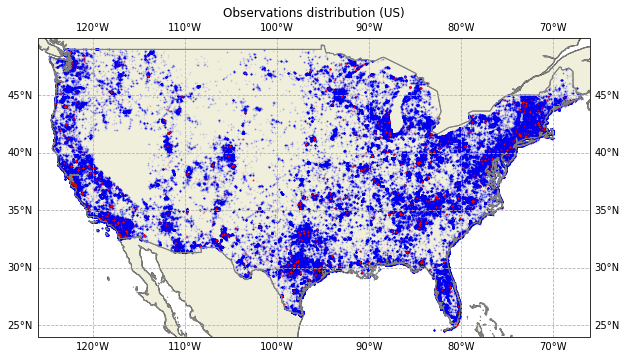

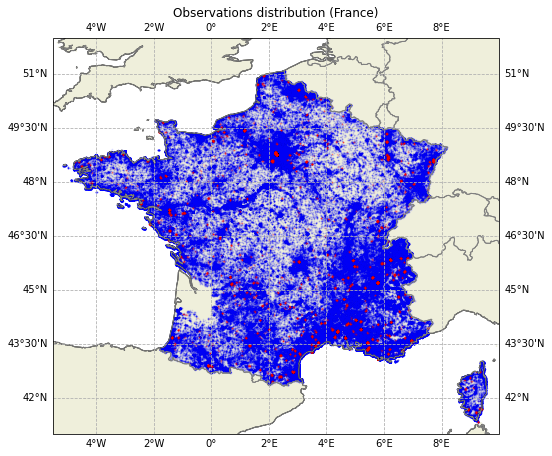

In [ ]:
def plot_observations_distribution(ax, df_obs, df_obs_test=None, **kwargs):
    default_kwargs = {
        "zorder": 1,
        "alpha": 0.1,
        "s": 0.5
    }
    default_kwargs.update(kwargs)
    kwargs = default_kwargs
    
    ax.scatter(df_obs.longitude, df_obs.latitude, color="blue", **kwargs)
    
    if df_obs_test is not None:
        ax.scatter(df_obs_test.longitude, df_obs_test.latitude, color="red", **kwargs)


fig = plt.figure(figsize=(10, 5.5))
ax = plot_map(region="us")
plot_observations_distribution(ax, df_obs_us, df_obs_us_test)
ax.set_title("Observations distribution (US)")

fig = plt.figure(figsize=(8, 8))
ax = plot_map(region="fr")
plot_observations_distribution(ax, df_obs_fr, df_obs_fr_test)
ax.set_title("Observations distribution (France)")



Total number of species: 17037


(1, 6701.000000000001)

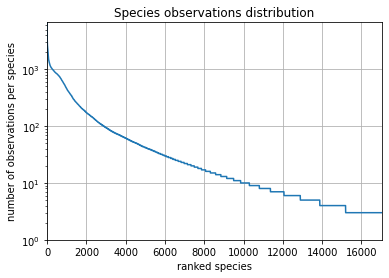

In [ ]:
species_value_counts = df_obs["species_id"].value_counts()

print("Total number of species: {}".format(len(species_value_counts)))


fig = plt.figure()
ax = fig.gca()

x = np.arange(len(species_value_counts))
ax.plot(x, species_value_counts)

ax.set_yscale("log")

ax.set_xlabel("ranked species")
ax.set_ylabel("number of observations per species")
ax.set_title("Species observations distribution")

ax.grid()
ax.autoscale(tight=True)
ax.set_ylim(bottom=1)

# KNN Long Lat

In [ ]:
df_obs.head()

In [ ]:
SUBMISSION_PATH = Path("/content/drive/MyDrive/ds3/submissions")

from GLC2022_FinalProject.GLC.metrics import top_30_error_rate, top_k_error_rate_from_sets, predict_top_30_set
from GLC2022_FinalProject.GLC.submission import generate_submission_file
from sklearn.neighbors import NearestNeighbors

In [ ]:
obs_id_train = df_obs.index[df_obs["subset"] == "train"].values
obs_id_val = df_obs.index[df_obs["subset"] == "val"].values
obs_id_test = df_obs_test.index.values

y_train = df_obs.loc[obs_id_train]["species_id"].values
y_val = df_obs.loc[obs_id_val]["species_id"].values

n_obs = len(df_obs)
n_train = len(obs_id_train)
n_val = len(obs_id_val)
n_test = len(obs_id_test)

print(f'Data set size: {n_obs} observations')
print(f'Train set size: {n_train} - {n_train / n_obs :.2%} of observations')
print(f'Validation set size: {n_val} - {n_val / n_obs :.2%} of observations')
print(f'Test set size: {n_test} - {n_test/n_train:.2%} of observations')

Data set size: 1627475 observations
Train set size: 1587395 - 97.54% of observations
Validation set size: 40080 - 2.46% of observations
Test set size: 36421 - 2.29% of observations


In [ ]:
n_neighbors = 1200

X_train = df_obs.loc[obs_id_train][['latitude','longitude']].values.copy()
X_val = df_obs.loc[obs_id_val][['latitude','longitude']].values.copy()
X_test = df_obs_test[['latitude','longitude']].values.copy()

In [ ]:
def pred_line(line, y, top_k = 30):
    exta = line
    arr = y[exta]
    u, count = np.unique(arr, return_counts=True)
    count_sort_ind = np.argsort(-count)
    return u[count_sort_ind][:top_k]


def predict_NN(model, X_loc, y, top_k=30):
    distances, indices = model.kneighbors(X_loc)
    #print(f'NN dist: {len(distances)} and NN indices: {len(indices)}')
    indices
    preds = []
    for i in range(len(indices)):
        preds.append(pred_line(indices[i],y,top_k))
    pred = np.array(preds)
    return np.array(preds)


X_train_loc = X_train.copy()
X_val_loc = X_val.copy()
X_test_loc = X_test.copy()

nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(X_train_loc)

s_pred = predict_NN(nbrs, X_val_loc, y_train)
score = top_k_error_rate_from_sets(y_val, s_pred)
print(f'KNN {n_neighbors} - Top-30 error rate: {score:.2%}')

NN dist: 40080 and NN indices: 40080
KNN 1200 - Top-30 error rate: 79.69%


In [ ]:
unique_preds = np.unique(predict_NN(nbrs, X_val_loc, y_train, 40))

filter_keep = np.isin(y_train, unique_preds)

y_train_bis = y_train[filter_keep]
X_train_loc_bis = X_train_loc[filter_keep]

print(f' propotion of target kept: {len(np.unique(y_train_bis))/len(np.unique(y_train)):.2%}')
print(f' propotion of instance kept: {len(y_train_bis)/len(y_train):.2%}')

nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(X_train_loc_bis)

s_pred_bis = predict_NN(nbrs, X_val_loc, y_train_bis)
score = top_k_error_rate_from_sets(y_val, s_pred_bis)
print(f'KNN {n_neighbors} - Top-30 error rate: {score:.2%}')

NN dist: 40080 and NN indices: 40080
 propotion of target kept: 30.70%
 propotion of instance kept: 87.66%
NN dist: 40080 and NN indices: 40080
KNN 1200 - Top-30 error rate: 79.66%


In [ ]:
# retrain on whole data set
#nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(df_obs[['latitude','longitude']].values)

# Compute baseline on the test set
s_pred = predict_NN(nbrs, X_test_loc, y_train_bis)

# Generate the submission file
generate_submission_file(SUBMISSION_PATH / "lat_long_knn_1200.csv", df_obs_test.index, s_pred)

NN dist: 36421 and NN indices: 36421


#Patch Extractor

In [ ]:
#(1) Load Patch Extractor infor
# 2 pull species information
del extractor

#Pull patch from Rasters. Instead of full size (256), pull size=1
# to allow the ability to list raster details for observations

In [ ]:
extractor = PatchExtractor(DATA_PATH / "rasters", size=1) 
extractor.add_all_rasters()

print("Number of rasters: {}".format(len(extractor)))

Number of rasters: 27


In [ ]:
df10ko = pd.read_csv(DATA_PATH /"oID_LatLong_10000.csv",sep=',')
df10ks =  pd.read_csv(DATA_PATH /"spID_10000.csv",sep=',')

df10ks = df10ks.drop(['Unnamed: 0'],axis=1)
df10ko = df10ko.drop(['Unnamed: 0'],axis=1)
df10ks.head()

,species_id
0,101
1,700
2,1456
3,157
4,305


In [ ]:
#df_obsggr.drop(['Unnamed: 0'], axis=1)
df_obs_testSet = df_obs_testSet.drop(['subset'],axis=1)
#df_obs_testSet = df_obs_testSet.reset_index()
df_obs_testSet = df_obs_testSet.reset_index()
del df_obs_testSet['index']
dfy = df_obs_testSet.iloc[:,-1]
#df_obs_testSet = df_obs_testSet.drop(['species_id'],axis=1)
print(dfy)




In [ ]:
X = np.asarray(df10ko)
print(type(extractor))
print(X)

<class 'GLC2022_FinalProject.GLC.data_loading.environmental_raster.PatchExtractor'>
[[ 0.00000000e+00  1.01311880e+07  4.51469727e+01  6.41679430e+00]
 [ 1.00000000e+00  1.07993620e+07  4.67836952e+01 -2.07285500e+00]
 [ 2.00000000e+00  1.03925360e+07  4.86048660e+01 -2.82500339e+00]
 ...
 [ 9.99600000e+03  1.07869830e+07  4.55321808e+01  2.84959602e+00]
 [ 9.99700000e+03  1.02873770e+07  4.45616913e+01  4.59863186e+00]
 [ 9.99800000e+03  1.00122480e+07  4.88616142e+01  2.51668620e+00]]


In [ ]:
patch = extractor[43.61, 3.88]
print(X[1][3])
print(list(extractor[48.9532165527344,1.96721088886261]))
print("Patch shape: {}".format(patch.shape))
print("Data type: {}".format(patch.dtype))

1.96721088886261
[10.758333, 7.866667, 34.65492, 554.3171, 23.8, 1.1, 22.699999, 7.65, 6.9, 17.733334, 4.2, 637.0, 61.0, 43.0, 10.383716, 174.0, 145.0, 151.0, 161.0, 1705.0, 1415.0, 11.0, 15.0, 17.0, 58.0, 44.0, 41.0]
Patch shape: (27,)
Data type: float32


In [ ]:
del features

In [ ]:
features = []
for c in X:
  #print(c[2])
  features.append(list(c)+list(extractor[c[2],c[3]]))

In [ ]:
print(features[1])

[1.0, 10799362.0, 46.783695220947294, -2.07285499572754, 12.625, 6.65, 34.635418, 466.4396, 23.4, 4.2, 19.2, 8.116667, 18.366667, 18.416666, 7.15, 769.0, 92.0, 37.0, 32.17279, 271.0, 113.0, 137.0, 253.0, 1808.0, 1351.0, 21.0, 24.0, 31.0, 72.0, 34.0, 42.0]


In [ ]:
df_X = pd.DataFrame(features)
df_y = df10ks

df_X=df_X.drop([0],axis=1)
df_y.head()

,species_id
0,101
1,700
2,1456
3,157
4,305


In [ ]:
print(df_X.shape)
dataset = pd.concat([df_X,df_y],axis=1)
dataset.head()

(9999, 30)


,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,species_id
0,10131188.0,45.146973,6.416794,4.587500,9.058333,33.302696,664.602173,19.900000,-7.3,27.200001,...,362.0,1771.0,1219.0,28.0,18.0,49.0,61.0,38.0,45.0,101
1,10799362.0,46.783695,-2.072855,12.625000,6.650000,34.635418,466.439606,23.400000,4.2,19.200001,...,253.0,1808.0,1351.0,21.0,24.0,31.0,72.0,34.0,42.0,700
2,10392536.0,48.604866,-2.825003,11.579166,6.525000,37.500000,406.305176,21.400000,4.0,17.400000,...,282.0,1667.0,1277.0,18.0,22.0,24.0,63.0,37.0,40.0,1456
3,10335049.0,48.815567,-0.161431,10.295834,7.475000,36.286407,487.071289,22.100000,1.5,20.600000,...,235.0,1379.0,1321.0,19.0,25.0,26.0,65.0,56.0,20.0,157
4,10316490.0,47.210781,-1.569573,12.187500,8.541667,39.003044,514.636353,24.799999,2.9,21.900000,...,247.0,1800.0,1403.0,23.0,22.0,23.0,69.0,38.0,39.0,305


In [ ]:
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,species_id
0,10131188.0,45.146973,6.416794,4.587500,9.058333,33.302696,664.602173,19.900000,-7.3,27.200001,...,362.0,1771.0,1219.0,28.0,18.0,49.0,61.0,38.0,45.0,101
1,10799362.0,46.783695,-2.072855,12.625000,6.650000,34.635418,466.439606,23.400000,4.2,19.200001,...,253.0,1808.0,1351.0,21.0,24.0,31.0,72.0,34.0,42.0,700
2,10392536.0,48.604866,-2.825003,11.579166,6.525000,37.500000,406.305176,21.400000,4.0,17.400000,...,282.0,1667.0,1277.0,18.0,22.0,24.0,63.0,37.0,40.0,1456
3,10335049.0,48.815567,-0.161431,10.295834,7.475000,36.286407,487.071289,22.100000,1.5,20.600000,...,235.0,1379.0,1321.0,19.0,25.0,26.0,65.0,56.0,20.0,157
4,10316490.0,47.210781,-1.569573,12.187500,8.541667,39.003044,514.636353,24.799999,2.9,21.900000,...,247.0,1800.0,1403.0,23.0,22.0,23.0,69.0,38.0,39.0,305


In [ ]:
dataset = dataset.rename({-1:"Latitude",0:"Longitude",31:"glc19SpId"},axis='columns')

In [ ]:
dataset2 = dataset.drop([1],axis=1)

In [ ]:
dataset2.head()

In [ ]:
patch = extractor[29.7604, -95.3698]

print("Patch shape: {}".format(patch.shape))
print("Data type: {}".format(patch.dtype))

fig = plt.figure(figsize=(14, 16))
extractor.plot((29.7604, -95.3698), fig=fig)

#BaseModel


In [ ]:
from GLC2022_FinalProject.GLC.metrics import top_30_error_rate
from GLC2022_FinalProject.GLC.metrics import top_k_error_rate_from_sets
from GLC2022_FinalProject.GLC.metrics import predict_top_30_set
from GLC2022_FinalProject.GLC.submission import generate_submission_file

df_obs_fr = pd.read_csv(DATA_PATH / "observations" / "observations_fr_train.csv", sep=";", index_col="observation_id")
df_obs_us = pd.read_csv(DATA_PATH / "observations" / "observations_us_train.csv", sep=";", index_col="observation_id")
df_obs = pd.concat((df_obs_fr, df_obs_us))

obs_id_train = df_obs.index[df_obs["subset"] == "train"].values
obs_id_val = df_obs.index[df_obs["subset"] == "val"].values

y_train = df_obs.loc[obs_id_train]["species_id"].values
y_val = df_obs.loc[obs_id_val]["species_id"].values

n_val = len(obs_id_val)
print("Validation set size: {} ({:.1%} of train observations)".format(n_val, n_val / len(df_obs)))

df_obs_fr_test = pd.read_csv(DATA_PATH / "observations" / "observations_fr_test.csv", sep=";", index_col="observation_id")
df_obs_us_test = pd.read_csv(DATA_PATH / "observations" / "observations_us_test.csv", sep=";", index_col="observation_id")

df_obs_test = pd.concat((df_obs_fr_test, df_obs_us_test))

obs_id_test = df_obs_test.index.values

print("Number of observations for testing: {}".format(len(df_obs_test)))

df_obs_test.head()



In [ ]:
first_30_species = np.arange(30)
s_pred = np.tile(first_30_species[None], (len(df_obs_test), 1))
generate_submission_file(DATA_PATH / "submissions/sample_submission.csv", df_obs_test.index, s_pred)

In [ ]:
species_distribution = df_obs.loc[obs_id_train]["species_id"].value_counts(normalize=True)
top_30_most_observed = species_distribution.index.values[:30]

In [ ]:
s_pred = np.tile(top_30_most_observed[None], (n_val, 1))
score = top_k_error_rate_from_sets(y_val, s_pred)
print("Top-30 error rate: {:.1%}".format(score))

Top-30 error rate: 93.5%


In [ ]:
# Compute baseline on the test set
n_test = len(df_obs_test)
s_pred = np.tile(top_30_most_observed[None], (n_test, 1))

# Generate the submission file
generate_submission_file(DATA_PATH / "constant_top_30_most_present_species_baseline.csv", df_obs_test.index, s_pred)

In [ ]:
df_env = pd.read_csv(DATA_PATH / "pre-extracted" / "environmental_vectors.csv", sep=";", index_col="observation_id")

X_train = df_env.loc[obs_id_train].values
X_val = df_env.loc[obs_id_val].values
X_test = df_env.loc[obs_id_test].values

In [ ]:
df_env = pd.read_csv(DATA_PATH / "pre-extracted" / "environmental_vectors.csv", sep=";", index_col="observation_id")

X_train = df_env.loc[obs_id_train].values
X_val = df_env.loc[obs_id_val].values
X_test = df_env.loc[obs_id_test].values

#Run RandomForester

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(
    missing_values=np.nan,
    strategy="constant",
    fill_value=np.finfo(np.float32).min,
)
imp.fit(X_train)

X_train = imp.transform(X_train)
X_val = imp.transform(X_val)
X_test = imp.transform(X_test)
from sklearn.ensemble import RandomForestClassifier
est = RandomForestClassifier(n_estimators=16, max_depth=10, n_jobs=-1)
est.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=16, n_jobs=-1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
est = RandomForestClassifier(n_estimators=16, max_depth=10, n_jobs=-1)
est.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=16, n_jobs=-1)

In [ ]:
def batch_predict(predict_func, X, batch_size=1024):
    res = predict_func(X[:1])
    n_samples, n_outputs, dtype = X.shape[0], res.shape[1], res.dtype
    
    preds = np.empty((n_samples, n_outputs), dtype=dtype)
    
    for i in range(0, len(X), batch_size):
        X_batch = X[i:i+batch_size]
        preds[i:i+batch_size] = predict_func(X_batch)
            
    return preds

In [ ]:
def predict_func(X):
    y_score = est.predict_proba(X)
    s_pred = predict_top_30_set(y_score)
    return s_pred

s_val = batch_predict(predict_func, X_val, batch_size=1024)
score_val = top_k_error_rate_from_sets(y_val, s_val)
print("Top-30 error rate: {:.1%}".format(score_val))

In [ ]:
# Compute baseline on the test set
s_pred = batch_predict(predict_func, X_test, batch_size=1024)

# Generate the submission file
generate_submission_file(SUBMISSION_PATH / "random_forest_on_environmental_vectors.csv", df_obs_test.index, s_pred)

#CNN Test

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size = 2, input_shape = (8, 8, 13), activation = 'relu'))
model.add(Conv2D(128, kernel_size = 2, activation = 'relu')) 
model.add(MaxPooling2D(pool_size = 2, strides = 1))
model.add(Conv2D(16, kernel_size = 2, activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2, strides = 2))
model.add(MaxPooling2D(pool_size = 2, strides = 1))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 1348, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

In [ ]:
def fit_and_predict(X_train, y_train, Xtest, y_test):
    global model
    
    model.fit(x = X_train, y = y_train, epochs = 1, batch_size = 2000)
    (loss, accuracy) = model.evaluate(x = X_test, y = y_test)
    print('Loss: {} Accuracy: {}'.format(loss, accuracy * 100))
    
class GeoLifeClefDataset:
    def __init__(self, extractor, dataset, labels):
        self.extractor = extractor
        self.labels = labels
        self.dataset = dataset
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        tensor = self.extractor[self.dataset[idx]]
        return tensor, self.labels[idx]
patch_extractor = PatchExtractor('../rasters GLC19', size=8, verbose=True)
patch_extractor.append("alti")
patch_extractor.append("awc_top")
patch_extractor.append("bs_top")
patch_extractor.append("chbio_1")
patch_extractor.append("chbio_10")
patch_extractor.append("chbio_11")
patch_extractor.append("chbio_17")
patch_extractor.append("chbio_18")
patch_extractor.append("chbio_19")
patch_extractor.append("chbio_2")
patch_extractor.append("chbio_3")
patch_extractor.append("erodi")
patch_extractor.append("etp")
# dataset
df = pd.read_csv("../PL_trusted.csv",sep=';')
classes = set(df['glc19SpId'])
df = pd.concat([df.drop('glc19SpId',axis=1),pd.get_dummies(df['glc19SpId'],dtype=int)], axis=1)
dataset_list = list(zip(df["Latitude"],df["Longitude"]))
labels_list = (df.iloc[:, 10:]).values
train_ds = GeoLifeClefDataset(patch_extractor, dataset_list[:230000], labels_list[:230000])
test_ds = GeoLifeClefDataset(patch_extractor, dataset_list[230000:], labels_list[230000:])
datasets = {"train": train_ds, "val": test_ds}
X_train, y_train, X_test, y_test = [], [], [], []
for i in range(len(train_ds)):
    X_train.append(train_ds[i][0])
    y_train.append(train_ds[i][1])
for i in range(len(test_ds)):
    X_test.append(test_ds[i][0])
    y_test.append(test_ds[i][1])

In [ ]:
X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)    
X_train = np.reshape(X_train, (len(X_train),8,8,13))
X_test = np.reshape(X_test, (len(X_test),8,8,13))

In [ ]:
fit_and_predict(X_train, y_train, X_test, y_test)
model.save('CNN_Model.h5')

#Tools
 


In [ ]:
df_obs_testSet = df_obs.iloc[1:10000,:]

#df_obsggr.drop(['Unnamed: 0'], axis=1)
df_obs_testSet = df_obs_testSet.drop(['subset'],axis=1)
#df_obs_testSet = df_obs_testSet.reset_index()
df_obs_testSet = df_obs_testSet.reset_index()
del df_obs_testSet['index']
dfy = df_obs_testSet.iloc[:,-1]
#df_obs_testSet = df_obs_testSet.drop(['species_id'],axis=1)
print(dfy)

0        101
1        700
2       1456
3        157
4        305
        ... 
9994     702
9995    1274
9996     727
9997     234
9998      70
Name: species_id, Length: 9999, dtype: int64


In [ ]:
result = dataset2

In [ ]:

TEST_DS_PATH = Path("/content/drive/MyDrive/ds3/")
result.to_csv(os.path.join(TEST_DS_PATH, r"raster_SpId_10000.csv"))

In [ ]:
!pwd

/content


In [10]:
DATA_PATH = Path("/content/drive/MyDrive/ds3/")

df_obsggr = pd.read_csv(DATA_PATH / "GLC_obs_env.csv", sep=",")
df_obsggr = df_obsggr.drop(['Unnamed: 0'], axis=1)
df_obsggr = df_obsggr.drop(['observation_id'], axis=1)
df_obsggr.head()

,latitude,longitude,bio_1,bio_2,bio_3,bio_4,bio_5,bio_6,bio_7,bio_8,...,bio_19,bdticm,bldfie,cecsol,clyppt,orcdrc,phihox,sltppt,sndppt,species_id
0,44.964449,6.734335,1.420833,6.908333,29.272598,614.14930,15.1,-8.5,23.600000,-1.000000,...,358.0,2082.0,988.0,29.0,13.0,63.0,62.0,34.0,53.0,3748
1,42.949856,0.226932,8.837500,9.858334,37.771393,586.81390,23.8,-2.3,26.099998,6.016667,...,288.0,1816.0,1142.0,20.0,22.0,39.0,58.0,41.0,36.0,1206
2,45.031666,5.548889,6.241667,8.350000,32.239384,632.86090,21.0,-4.9,25.900000,3.033333,...,317.0,1346.0,1075.0,29.0,22.0,54.0,59.0,40.0,38.0,51
3,45.405880,0.139628,12.554167,9.525001,40.189877,541.80865,25.9,2.2,23.699999,6.850000,...,257.0,1227.0,1383.0,21.0,28.0,18.0,71.0,46.0,25.0,415
4,44.487000,5.958154,8.029167,10.075000,36.636364,633.01750,23.7,-3.8,27.500000,4.616667,...,280.0,2833.0,1202.0,24.0,25.0,33.0,69.0,38.0,37.0,287


In [15]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df_obsggr)
print(df.shape)
x = df.iloc[:10000,:-1]
y = df.iloc[:10000,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=101)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1543454, 30)
(8000, 29)
(8000,)
(2000, 29)
(2000,)


Feature: 0, Score: 0.06405
Feature: 1, Score: 0.05476
Feature: 2, Score: 0.02872
Feature: 3, Score: 0.03442
Feature: 4, Score: 0.04728
Feature: 5, Score: 0.03641
Feature: 6, Score: 0.02113
Feature: 7, Score: 0.01850
Feature: 8, Score: 0.02770
Feature: 9, Score: 0.04290
Feature: 10, Score: 0.03027
Feature: 11, Score: 0.02459
Feature: 12, Score: 0.02618
Feature: 13, Score: 0.02764
Feature: 14, Score: 0.02552
Feature: 15, Score: 0.01562
Feature: 16, Score: 0.04663
Feature: 17, Score: 0.03198
Feature: 18, Score: 0.02234
Feature: 19, Score: 0.02538
Feature: 20, Score: 0.02771
Feature: 21, Score: 0.05856
Feature: 22, Score: 0.05792
Feature: 23, Score: 0.03420
Feature: 24, Score: 0.02852
Feature: 25, Score: 0.04470
Feature: 26, Score: 0.03582
Feature: 27, Score: 0.02818
Feature: 28, Score: 0.03239


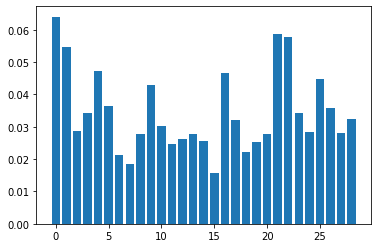

In [16]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
#, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.04737
Feature: 1, Score: 0.04676
Feature: 2, Score: 0.03440
Feature: 3, Score: 0.03537
Feature: 4, Score: 0.03849
Feature: 5, Score: 0.03615
Feature: 6, Score: 0.02773
Feature: 7, Score: 0.02666
Feature: 8, Score: 0.03008
Feature: 9, Score: 0.03699
Feature: 10, Score: 0.03520
Feature: 11, Score: 0.03327
Feature: 12, Score: 0.03332
Feature: 13, Score: 0.03417
Feature: 14, Score: 0.02792
Feature: 15, Score: 0.02448
Feature: 16, Score: 0.03808
Feature: 17, Score: 0.03145
Feature: 18, Score: 0.02998
Feature: 19, Score: 0.03117
Feature: 20, Score: 0.03211
Feature: 21, Score: 0.04596
Feature: 22, Score: 0.04313
Feature: 23, Score: 0.03195
Feature: 24, Score: 0.03200
Feature: 25, Score: 0.03568
Feature: 26, Score: 0.03290
Feature: 27, Score: 0.03316
Feature: 28, Score: 0.03408


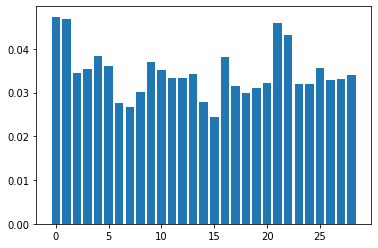

In [28]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(x_train,y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [37]:
toss_feature = []
z = 0
for i in importance:
  if i < 0.03: 
    toss_feature.append(z)
  z = z + 1
print(toss_feature)

[6, 7, 14, 15, 18]


In [ ]:
del df_obs_env

#Create GLC Observation and Enviroment Dataset

In [ ]:
df_env = pd.read_csv(DATA_PATH / "pre-extracted" / "environmental_vectors.csv", sep=";", index_col="observation_id")
df_env.head()

df_env2 = df_env
df_env2 = df_env2.reset_index()
print(df_env2.shape)

df_obs2 = df_obs
df_obs2 = df_obs2.reset_index()
print(df_obs2.shape)

list_obs_id = df_obs2.iloc[:,0].values.tolist()
print(len(list_obs_id))

df_env3 = df_env2[df_env2['observation_id'].isin(list_obs_id)]
print(df_env3.shape)

#df_env3.head()
df_obs2 = df_obs2.set_index('observation_id')
df_obs2 = df_obs2.sort_index()
df_obs3 = df_obs2.reset_index()
#df_obs2.head()




In [ ]:
dfa = df_obs3.iloc[:,0:3]
dfb = df_env3.iloc[:,:28]
dfy = df_obs3.drop(['latitude','longitude','subset'], axis=1)

#dfa[0].round()

print(dfa.shape)
print(dfb.shape)
dfy.head()

In [ ]:
print(dfa.shape)
print(dfb.shape)

result = pd.merge(dfa, dfb, on="observation_id")
result = pd.merge(result, dfy, on="observation_id")
result.head()

#Random Forest

In [ ]:
#Need Training data
#Raster Extractor
#possibly adjust the lat/long
x = cos(lat) * cos(lon)
y = cos(lat) * sin(lon), 
z = sin(lat) 




In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:

df_obsggr = pd.read_csv(DATA_PATH / "raster_SpId_10000.csv", sep=",")
df_obsggr = df_obsggr.drop(['Unnamed: 0'], axis=1)
#df_obsggr = df_obsggr.drop(['observation_id'], axis=1)
df_obsggr.head()

df_obsggr = clean_dataset(df_obsggr)

x = df_obsggr.iloc[:,:-1]
y = df_obsggr.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=101)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(7711, 29)
(7711,)
(1928, 29)
(1928,)


In [ ]:
#normalize the data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)

In [ ]:
# Number of trees in random forest
n_estimators = [100] #[int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [8,16]
# Minimum number of samples required to split a node
min_samples_split = [30,60]
# Minimum number of samples required at each leaf node
min_samples_leaf = [50]
# Method of selecting samples for training each tree
bootstrap = [True]

# Create the param grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100], 'max_features': ['auto', 'sqrt'], 'max_depth': [8, 16], 'min_samples_split': [30, 60], 'min_samples_leaf': [50], 'bootstrap': [True]}


In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator = rf_Model, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)



In [ ]:
rf_random.fit(x_train, y_train) #fit is to initiate training process

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [8, 16],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [50],
                                        'min_samples_split': [30, 60],
                                        'n_estimators': [100]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 16,
 'max_features': 'auto',
 'min_samples_leaf': 50,
 'min_samples_split': 60,
 'n_estimators': 100}

In [ ]:

print (f'Train Accuracy - : {rf_random.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_random.score(x_test,y_test):.3f}')

Train Accuracy - : 0.296
Test Accuracy - : 0.010
